## Machine Learning Project 2.0 - Twitter Climate Change Classification Problem 🐦


### Honour Code

We, **Siyamthanda Buthelezi, Vuyo Dila, Zithulele Manyathi, Neo Motaung, Nolwazi Ngubo and Hlakaniphile Zwane**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction and Current Market Trends</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>


<a id="one"></a>

# Introduction and Current Market Trends

<a href=#cont>Back to Table of Contents </a> 

### Introduction 
According to the United Nations, climate change refers to long-term shifts in temperatures and weather patterns. It further explains that these changes could be natural or unnatural. Human beings are deemed responsible for the exponential growth of the Earth’s temperature in the last 200 plus years due to their burning of fossil fuels like coal, oil, and gas (United Nations, n.d). However, there are people who disagree that climate change is man-made, citing that the evidence supporting a man-made cause is inconclusive and that the changes in measured temperatures are part of the natural cycle, to name a few.

As there are people against the concept of man-made climate change, there are those who support it. They believe that, in addition to burning fossil fuels, clearing land and cutting down forests can also contribute to climate change, and that climate change can affect our health, ability to grow food, housing, safety, and work. Amidst these conflicting perspectives, there are individuals who remain neutral and sources of information, news, that provide factual insights about climate change. Such factual insights include, but are not limited to, scientific evidence indicating that human activities are responsible for the emission of greenhouse gases, resulting in a rapid warming of the planet, unprecedented in at least the past two thousand years.

Such changes have prompted government bodies across the globe to become more environmentally conscious. For example, countries like Spain are considering expanding their investments in renewable energy resources infrastructure. To address the challenges posed by climate change and its negative effects, global leaders achieved a significant milestone on December 12, 2015, during the UN Climate Change Conference (COP21) in Paris: the groundbreaking Paris Agreement. Consequently, most companies are working on reducing their carbon emissions and establishing sustainability goals.

We look into the public perception regarding climate change to provide valuable insight for companies committed to reducing their carbon footprint. These companies can enhance their marketing tactics and customize their messaging by understanding people's perceptions of climate change and whether they see it as an actual concern. Ultimately, this enables them to estimate how their products are going to be received by the public.


### Current Market Trends
Companies around the globe are reducing their carbon footprint by utilising sustainable energy to offer environmentally friendly products. There are conflicting views when it comes to man-made climate change, and they affect how these products are received by the public. Marketing is important for a business as it helps the business acquire and retain customers, drive profit and enhance engagement to name a few. Efficient marketing tactics are essential for building a robust market presence and engaging effectively with the intended audience (Jain, 2023). By gauging which sentiment is prominent, general perspective towards manmade climate change, companies will come up with informed and efficient marketing strategies. A company neglecting research and analysis of its audience to craft personalised messaging that connects with potential customers can lead to ineffective communication, lack of engagement, and ultimately, lower conversion rates. Having an application that can classify whether a person believes in climate change or not based on their tweets, can assist with their marketing strategies. Twitter, now X, is perceived as a primary source for news, especially regarding politics, encompassing content from mainstream brands, smaller/alternative sources, and politicians, distinguishing it from other platforms (Reuters Institute for the Study of Journalism, n.d). Concluding that X serves as a credible resource for gauging public sentiment on climate-related matters would be a reasonable assertion.

<a id="two"></a>

# 2. Importing Packages

<a href=#cont>Back to Table of Contents</a>


In [ ]:
from comet_ml import Experiment

In [2]:
# Setting the API key (saved as environment variable)
experiment = Experiment(
  api_key="6fyoJnx9bnNFGpiGWQWhxJjK3",
  project_name="general",
  workspace="d3konr3kon",
  log_code=True
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/zwaneht/2309am1-ac-predict/76d56dde64f244faba60ed3db6f330ef



In [3]:
# Standard libraries
import re
import csv
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Style
import matplotlib.style as style 
from PIL import Image
from wordcloud import WordCloud

# Downloads

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Preprocessing
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB


# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hlaka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hlaka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hlaka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hlaka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<a id="three"></a>

# 3. Loading Data
<a href=#cont>Back to Table of Contents</a>


In this section, the data was loaded the from the `train` and `test_with_no_labels` file into a DataFrame, using the Pandas function .read_csv()  

## Dataset Description
Where is this data from?
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### Class Description

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

### Features

- sentiment: Which class a tweet belongs in (refer to Class Description above)

- message: Tweet body

- tweetid: Twitter unique id

The files provided

train.csv - You will use this data to train your model.

test.csv - You will use this data to test your model.

SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

In [4]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test_with_no_labels.csv')

Let's take a sneak peek at our training data. The `head()` function was used to view the top rows of the data, and the `tail()` function was used to show the bottom rows of the data. Since the number of rows was not specified, the top 5 and bottom 5 rows were shown, respectively.

In [5]:
df.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Looking at the above we can see our dataset has the  following features for the:
- Sentiments: the dependand feature
- Message: Independant feature 
- Tweetid: Independant feature

While the test dataset does not have the target variable

In [7]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

We checked for the null values from the train dataset and we have no nulls

In [8]:
# Lets check for the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


These are sentiment and tweetid taking only values that are of type int64 while the message feature accept only object (strings)

In [9]:
# Make a  copy dataset into a new variable called  
train_df = df.copy()
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### Remove 'noisy entities' such as URL's, punctuations, mentions, numbers and extra white space. 

In [10]:
def clean_tweet(tweet):
    """
    Clean the input tweet by removing URLs, mentions, hashtags, punctuation,
    numbers, extra white space, and converting everything to lowercase.
    
    Args:
    tweet (str): The original tweet text.
    
    Returns:
    str: The modified/cleaned tweet text.
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove URLs
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    
    # Remove punctuation
    tweet = re.sub(r"[^\w\s]", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet)
    
    # Remove leading and trailing whitespace
    tweet = tweet.strip()
    
    return tweet

# Clean the tweets in the 'message' column of the DataFrame
train_df['message'] = train_df['message'].apply(clean_tweet)

# Display the first few rows of the DataFrame
train_df.head()


,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon di...,625221
1,1,it s not like we lack evidence of anthropogeni...,126103
2,2,rt researchers say we have three years to act ...,698562
3,1,wired was a pivotal year in the war on climate...,573736
4,1,rt it s and a racist sexist climate change den...,466954


The **noisy entities** such as URL's, punctuations, mentions, numbers and extra white space are being removed. And the data is further normalized by converting all letters to lowercase.

<a id="four"></a>

# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

#### Lets confirm the tweet count for each class

In [11]:
tweet_counts = df['sentiment'].value_counts()
tweet_counts.head()

sentiment
 1    8530
 2    3640
 0    2353
-1    1296
Name: count, dtype: int64

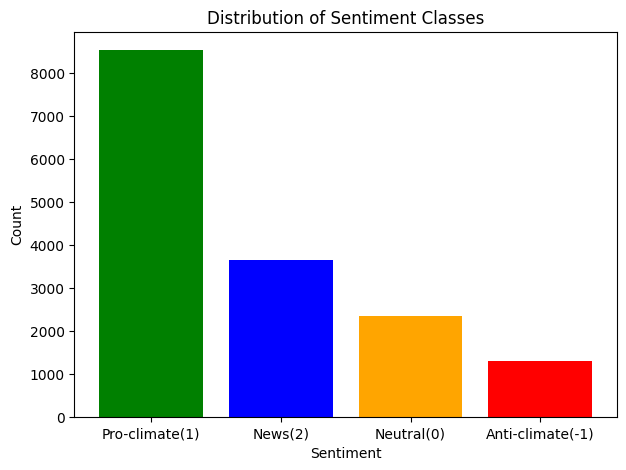

In [12]:

sentiment_labels = ['Pro-climate(1)', 'News(2)', 'Neutral(0)', 'Anti-climate(-1)' ]
sentiment_counts = [8530, 3640, 2353, 1296]  # Update with your actual counts

# Create a bar plot
plt.figure(figsize=(7, 5))
plt.bar(sentiment_labels, sentiment_counts, color=['green', 'blue', 'orange', 'red'])
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


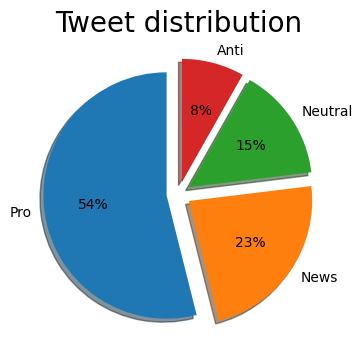

In [13]:

plt.figure(figsize=(6, 4))

labels = ['Pro', 'News', 'Neutral', 'Anti'] 

plt.pie(df['sentiment'].value_counts(),
        labels=labels,
        autopct='%1.0f%%',
        shadow=True,
        startangle=90,
        explode=(0.1, 0.1, 0.1, 0.1))

plt.title('Tweet distribution', fontsize=20)
plt.show()


### Observations -

- News (Class 2) (23%): This class has 3640 tweets, as per the count you provided. These tweets likely link to factual news about climate change.

- Pro (Class 1) (54%): This class has 8530 tweets, making it the most prevalent sentiment in your dataset. These tweets likely express support for the belief in man-made climate change.

- Neutral (Class 0) (15%): This class has 2353 tweets. Tweets in this category neither support nor refute the belief in man-made climate change.

- Anti (Class -1) (8%): This class has 1296 tweets, indicating a smaller number of tweets that express disbelief in man-made climate change.



### Hashtag extraction
Hashtags are extracted from the original  tweets and stored in seperate dataframes for each class. This is done before tweet cleaning to ensure no information is lost.

In [14]:
# Make a  copy dataset into a new variable called  
train_df = df.copy()
train_df.head()

def extract_top_hashtags(tweet_texts):
    """
    Extracts the top 15 hashtags from the given list of tweets.
    
    Args:
    tweet_texts (list): A list of tweet texts.
    
    Returns:
    pd.DataFrame: DataFrame containing the top hashtags and their frequency count.
    """
    # Initialize an empty list to store hashtags
    hashtags = []
    
    # Extract hashtags from each tweet using regular expressions
    for text in tweet_texts:
        extracted_hashtags = re.findall(r"#(\w+)", text)
        hashtags.extend(extracted_hashtags)
        
    # Calculate the frequency distribution of hashtags
    frequency_distribution = nltk.FreqDist(hashtags)
    
    # Create a DataFrame to store hashtags and their frequency count
    hashtag_df = pd.DataFrame({'hashtag': list(frequency_distribution.keys()),
                               'count': list(frequency_distribution.values())})
    
    # Select the top 15 hashtags based on frequency count
    top_15_hashtags = hashtag_df.nlargest(15, columns="count")
    
    return top_15_hashtags

# Example usage
pro_hashtags = extract_top_hashtags(train_df['message'][train_df['sentiment'] == 1])
anti_hashtags = extract_top_hashtags(train_df['message'][train_df['sentiment'] == -1])
neutral_hashtags = extract_top_hashtags(train_df['message'][train_df['sentiment'] == 0])
news_hashtags = extract_top_hashtags(train_df['message'][train_df['sentiment'] == 2])

pro_hashtags.head()


,hashtag,count
19,climate,187
24,BeforeTheFlood,129
68,climatechange,94
13,ImVotingBecause,62
4,COP22,59


***From the top 5 hashtags extracted for this sentiment class, we can infer the following:***

- "climate": This hashtag appears frequently in tweets related to the sentiment class. It likely indicates that discussions within this sentiment class often revolve around climate-related topics.

- "BeforeTheFlood": This hashtag appears frequently, suggesting that there may be discussions or references to a specific event, campaign, or documentary related to climate change.

- "climatechange": Similar to the first hashtag, "climatechange" indicates discussions about the broader concept of climate change.

- "ImVotingBecause": This hashtag may suggest that some tweets within this sentiment class are related to political action or advocacy, potentially indicating a focus on climate change policy or elections.

- "COP22": This hashtag likely refers to the 22nd Conference of the Parties (COP22), an international climate conference. Its presence indicates discussions or references to events or outcomes associated with this conference.

These hashtags provide insight into the main topics and themes being discussed within this sentiment class, including climate change, specific events or campaigns, political engagement, and international conferences related to climate action.

C:\Users\hlaka\AppData\Local\Temp\ipykernel_32896\1795910539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hashtag', data=hashtag_df, palette='viridis')


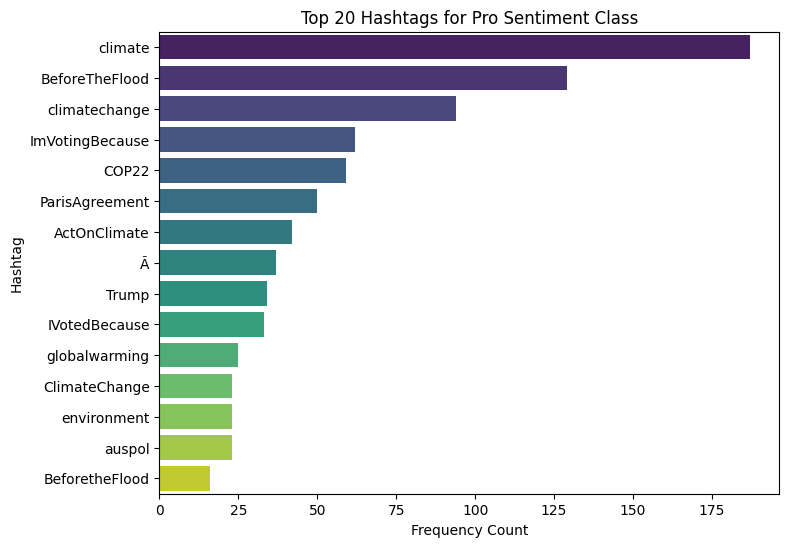

C:\Users\hlaka\AppData\Local\Temp\ipykernel_32896\1795910539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hashtag', data=hashtag_df, palette='viridis')


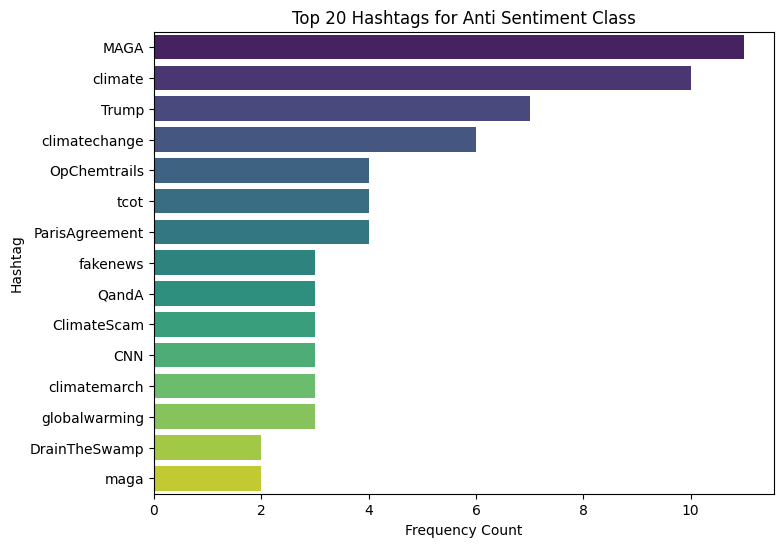

C:\Users\hlaka\AppData\Local\Temp\ipykernel_32896\1795910539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hashtag', data=hashtag_df, palette='viridis')


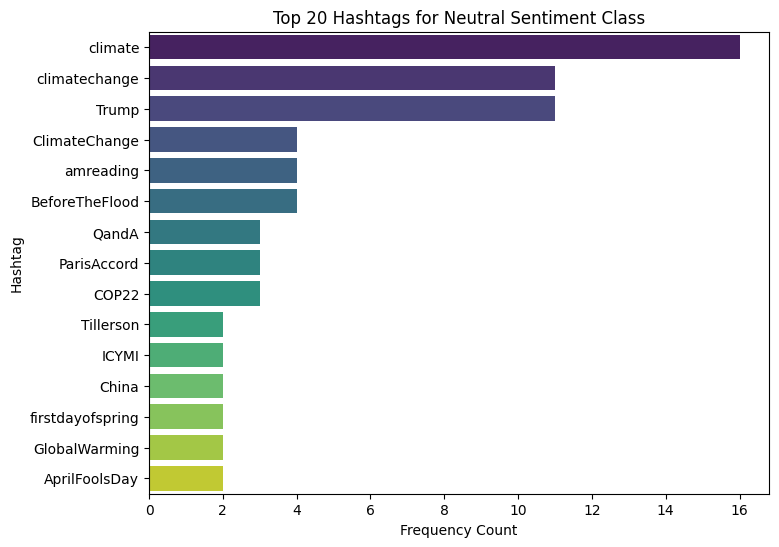

C:\Users\hlaka\AppData\Local\Temp\ipykernel_32896\1795910539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='hashtag', data=hashtag_df, palette='viridis')


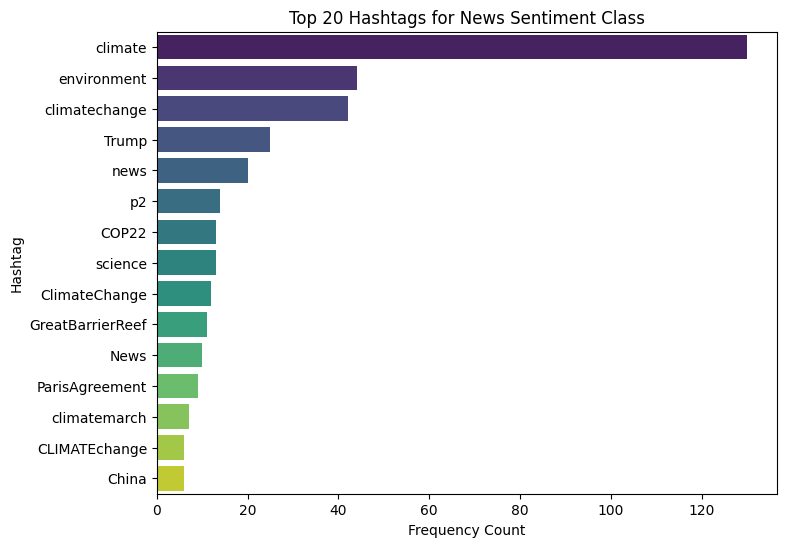

In [15]:
# Lets create some visuals for our hashtags
def visualize_top_hashtags(hashtag_df, sentiment_class):
    """
    Visualize the top hashtags for a specific sentiment class.
    
    Args:
    hashtag_df (pd.DataFrame): DataFrame containing the top hashtags and their frequency count.
    sentiment_class (str): Sentiment class label (e.g., "Pro", "Anti", "Neutral", "News").
    
    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.barplot(x='count', y='hashtag', data=hashtag_df, palette='viridis')
    plt.title(f"Top 20 Hashtags for {sentiment_class} Sentiment Class")
    plt.xlabel("Frequency Count")
    plt.ylabel("Hashtag")
    plt.show()

# Example usage
visualize_top_hashtags(pro_hashtags, "Pro")
visualize_top_hashtags(anti_hashtags, "Anti")
visualize_top_hashtags(neutral_hashtags, "Neutral")
visualize_top_hashtags(news_hashtags, "News")


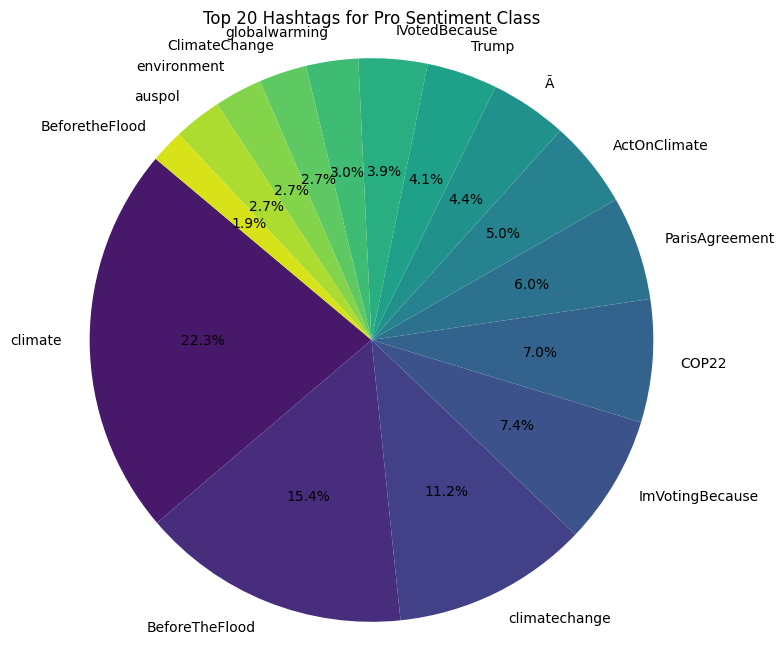

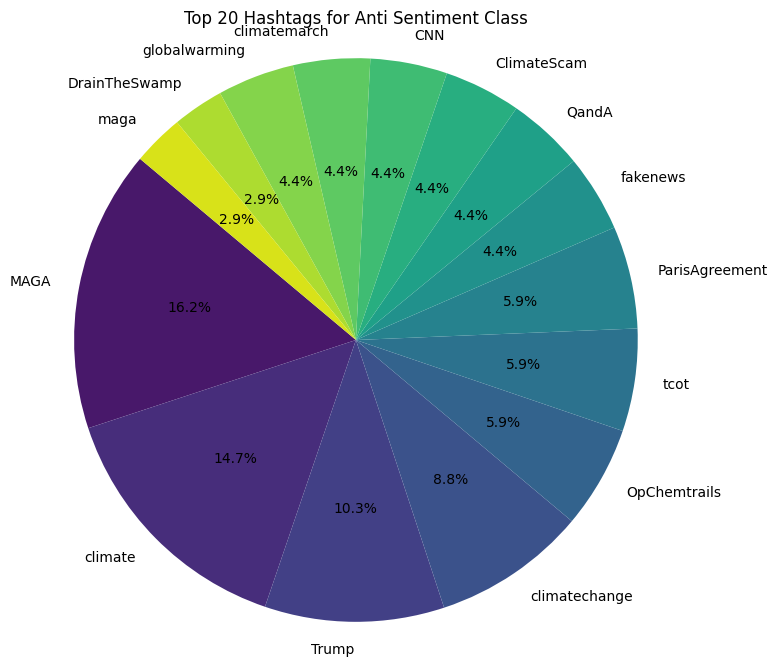

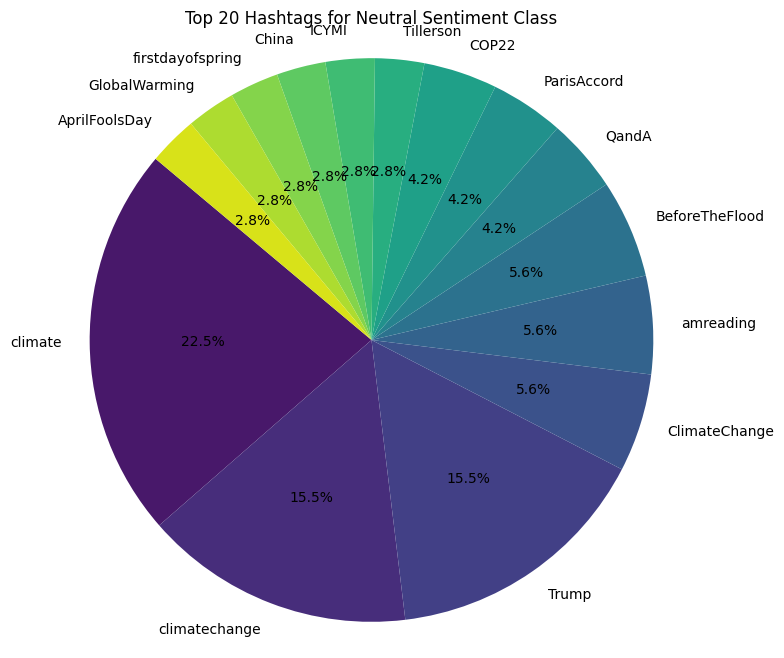

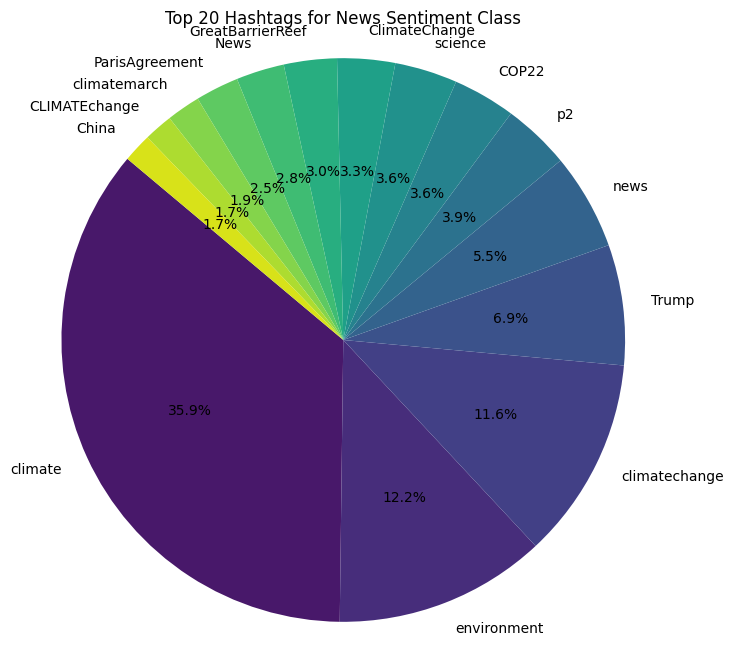

In [16]:
def visualize_top_hashtags_pie(hashtag_df, sentiment_class):
    """
    Visualize the top hashtags for a specific sentiment class using a pie chart.
    
    Args:
    hashtag_df (pd.DataFrame): DataFrame containing the top hashtags and their frequency count.
    sentiment_class (str): Sentiment class label (e.g., "Pro", "Anti", "Neutral", "News").
    
    Returns:
    None
    """
    plt.figure(figsize=(8, 8))
    plt.pie(hashtag_df['count'], labels=hashtag_df['hashtag'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', n_colors=len(hashtag_df)))
    plt.title(f"Top 20 Hashtags for {sentiment_class} Sentiment Class")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example usage
visualize_top_hashtags_pie(pro_hashtags, "Pro")
visualize_top_hashtags_pie(anti_hashtags, "Anti")
visualize_top_hashtags_pie(neutral_hashtags, "Neutral")
visualize_top_hashtags_pie(news_hashtags, "News")


***Analysis:***

- The hashtags "MAGA" and "Trump" rank as the first and third most frequently used hashtags in anti-climate change tweets, respectively. "MAGA," which stands for "Make America Great Again," originated as Donald Trump's campaign slogan during the 2016 elections. On Twitter, it became a rallying cry for his supporters, symbolized by the hashtag "#MAGA" and associated with support for Trump. This suggests that a significant portion of anti-climate change tweets stem from individuals who align with Trump's ideology.

- Additionally, "DrainTheSwamp" appears among the top anti-climate change hashtags. Trump popularized this phrase as a metaphor for his plan to address corruption within the federal government. During his presidential campaign, he vowed to address issues such as raising taxes on the wealthy, including hedge fund managers. The presence of this hashtag further reinforces the notion that many Trump supporters on Twitter also express anti-climate change sentiments.

- Further down the list, "TCOT" (Top Conservative On Twitter) holds the sixth position. This term serves as a means for conservatives, particularly Republicans, to connect with like-minded individuals on the platform. This trend underscores a recurring pattern of themes associated with Trump's presidency and conservative viewpoints.

- Finally, hashtags like "FakeNews" and "ClimateScam" also garner significant attention. These hashtags may be employed by individuals who oppose the concept of climate change to discredit information and sources they perceive as biased or inaccurate.

### Parts of Speech Tagging and Lemmatization
In this stage, we begin by assessing the length of each tweet and storing this data in a newly created column. Subsequently, we tokenize the tweets, followed by conducting Parts of Speech (POS) tagging on each word, and then perform lemmatization.

Lemmatization involves reducing words to their dictionary root form. For instance, "cats" is transformed into "cat". This process aims to prevent the creation of features that are semantically similar but syntactically different. Lemmatization is favored over stemming due to its ability to handle exceptions more effectively. Stemming, on the other hand, is a more simplistic method that truncates letters from the end of words until a root stem is reached. While effective in many cases, English presents numerous exceptions that necessitate a more refined approach.

In [17]:
def tokenize_and_pos_tag_tweets(df, column_name):
    """
    Tokenize the tweet messages in the specified column of the DataFrame,
    and perform part-of-speech (POS) tagging. Also, lemmatize the tokens.
    
    Args:
    df (pd.DataFrame): DataFrame containing tweet messages.
    column_name (str): Name of the column containing tweet messages.
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for tokenized tweets,
                  POS-tagged tweets, and lemmatized tokens.
    """
   
    
    # Tokenize the tweet messages
    df['tokenized'] = df[column_name].apply(word_tokenize)
    
    # Perform part-of-speech (POS) tagging on the tokenized tweet messages
    df['pos_tags'] = df['tokenized'].apply(nltk.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    lemmatizer = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

    
train_df = tokenize_and_pos_tag_tweets(train_df, 'message')
train_df


,sentiment,message,tweetid,tokenized,pos_tags,lemmatized
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...","[(PolySciMajor, n), (EPA, n), (chief, n), (doe...",PolySciMajor EPA chief do n't think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...","[(It, n), ('s, v), (not, r), (like, n), (we, n...",It 's not like we lack evidence of anthropogen...
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...","[(RT, n), (@, n), (RawStory, n), (:, n), (Rese...",RT @ RawStory : Researchers say we have three ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[(#, n), (TodayinMaker, n), (#, n), (WIRED, n)...",# TodayinMaker # WIRED : 2016 be a pivotal yea...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[(RT, n), (@, n), (SoyNovioDeTodas, n), (:, n)...","RT @ SoyNovioDeTodas : It 's 2016 , and a raci..."
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,"[RT, @, ezlusztig, :, They, took, down, the, m...","[(RT, n), (@, n), (ezlusztig, n), (:, n), (The...",RT @ ezlusztig : They take down the material o...
15815,2,RT @washingtonpost: How climate change could b...,17856,"[RT, @, washingtonpost, :, How, climate, chang...","[(RT, n), (@, v), (washingtonpost, n), (:, n),...",RT @ washingtonpost : How climate change could...
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,"[notiven, :, RT, :, nytimesworld, :, What, doe...","[(notiven, r), (:, n), (RT, n), (:, n), (nytim...",notiven : RT : nytimesworld : What do Trump ac...
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,"[RT, @, sara8smiles, :, Hey, liberals, the, cl...","[(RT, n), (@, a), (sara8smiles, n), (:, n), (H...",RT @ sara8smiles : Hey liberals the climate ch...


***Note that every word in the pos tags feature is tagged. These means that the tags provide valuable information about the grammatical function and syntactic role of each word in a sentence.***

**Here are some commonly used POS tags along with examples:**

Noun (NN): Represents a person, place, thing, or idea.

Example: "dog", "cat", "house", "city".
Verb (VB): Represents an action or a state of being.

Example: "run", "eat", "sleep", "is", "were".
Adjective (JJ): Describes or modifies a noun.

Example: "happy", "big", "beautiful", "red".
Adverb (RB): Describes or modifies a verb, adjective, or other adverb.

Example: "quickly", "very", "often", "extremely".
Determiner (DT): Indicates specificity or quantity of a noun.

Example: "the", "a", "an", "some", "many".
Pronoun (PRP): Replaces a noun in a sentence.

Example: "he", "she", "it", "they", "we".
Preposition (IN): Indicates a relationship between a noun/pronoun and other words in a sentence.

Example: "in", "on", "at", "from", "to".
Conjunction (CC): Joins words, phrases, or clauses.

Example: "and", "but", "or", "while".
Interjection (UH): Expresses emotions or feelings.

Example: "wow", "ouch", "hey", "hurray".


### Word frequency

Creating separate dataframes to store the 20 most frequent words and their respective frequencies for each class. Once this information has been extracted we will use these words to create wordclouds for each class.

Word clouds are a popular approach in nlp tasks, here they help us visualize and gain a better understanding of what is being said in each class.

In [18]:
def extract_top_words(tweet_texts, n=25):
    """
    Extract the top n most frequent words from a collection of tweets.
    
    Args:
    tweet_texts (list): A list of tweet texts.
    n (int): Number of top words to extract (default is 25).
    
    Returns:
    pd.DataFrame: DataFrame containing the top n words and their frequency counts.
    """
    # Initialize CountVectorizer with English stopwords excluded
    cv = CountVectorizer(stop_words='english')
    
    # Transform the tweet texts into a matrix of word counts
    words_matrix = cv.fit_transform(tweet_texts)
    
    # Sum the word counts across all tweets
    sum_words = words_matrix.sum(axis=0)
    
    # Get the vocabulary (words) and their corresponding indices
    vocabulary = cv.vocabulary_
    
    # Sort the words by frequency in descending order
    sorted_words_freq = sorted(vocabulary.items(), key=lambda x: sum_words[0, x[1]], reverse=True)
    
    # Extract the top n words and their frequencies
    top_n_words_freq = sorted_words_freq[:n]
    
    # Create a DataFrame to store the top n words and their frequencies
    top_words_df = pd.DataFrame(top_n_words_freq, columns=['word', 'freq'])
    
    return top_words_df


pro_top_words = extract_top_words(train_df['lemmatized'][train_df['sentiment'] == 1])
anti_top_words = extract_top_words(train_df['lemmatized'][train_df['sentiment'] == -1])
news_top_words = extract_top_words(train_df['lemmatized'][train_df['sentiment'] == 2])
neutral_top_words = extract_top_words(train_df['lemmatized'][train_df['sentiment'] == 0])

In [19]:
# Extract the words in the tweets for the pro and anti climate change classes 
anti_words = ' '.join([text for text in anti_top_words['word']])
pro_words = ' '.join([text for text in pro_top_words['word']])
news_words = ' '.join([text for text in news_top_words['word']])
neutral_words = ' '.join([text for text in neutral_top_words['word']])

# Create wordcloud for the anti climate change class
anti_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(anti_words)

# Create wordcolud for the pro climate change class
pro_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(pro_words)

# Create wordcolud for the news climate change class
news_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(news_words)

# Create wordcolud for the neutral climate change class
neutral_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(neutral_words)

pro_top_words.tail()

,word,freq
20,make,9379
21,husband,7303
22,stephenschlegel,14164
23,sjofonã,13771
24,epa,5250


#### Visualizing of those buzzwords

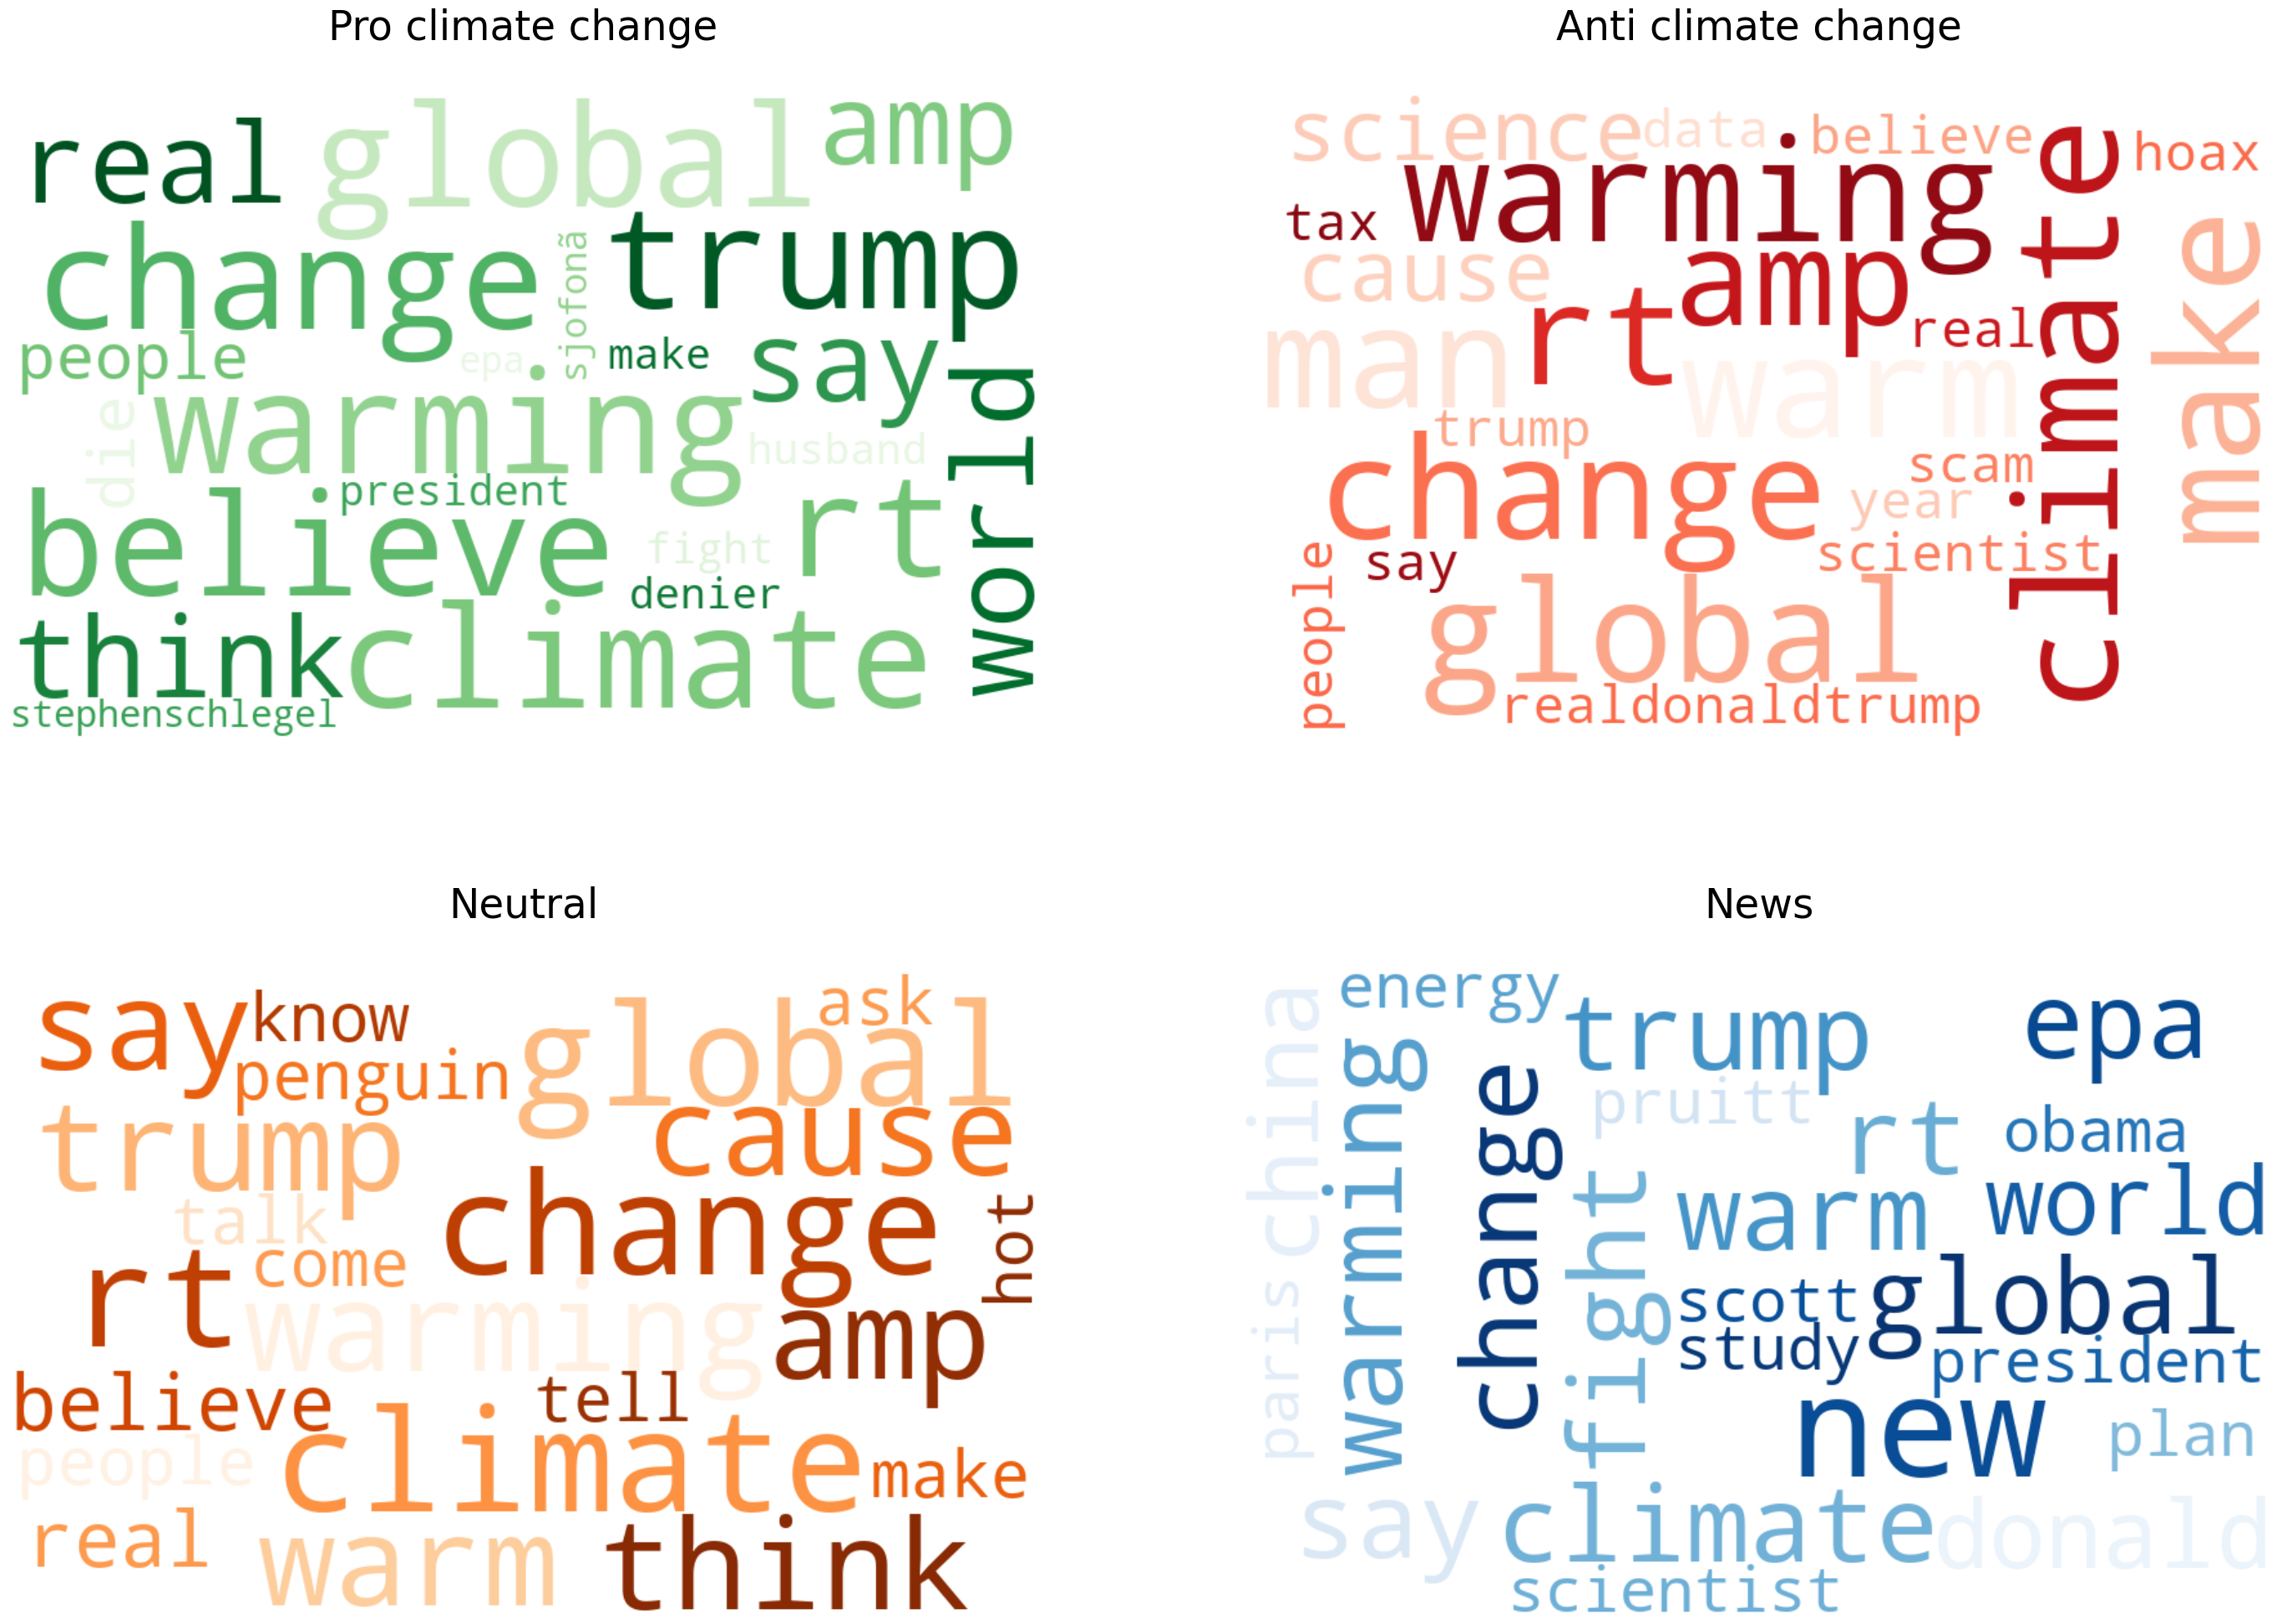

In [20]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(2,2, figsize=(35,25))
axarr[0,0].imshow(pro_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(anti_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(neutral_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(news_wordcloud, interpolation="bilinear")

# Remove the ticks on the x and y axes
for ax in f.axes:
    plt.sca(ax)
    plt.axis('off')

axarr[0,0].set_title('Pro climate change\n', fontsize=35)
axarr[0,1].set_title('Anti climate change\n', fontsize=35)
axarr[1,0].set_title('Neutral\n', fontsize=35)
axarr[1,1].set_title('News\n', fontsize=35)
#plt.tight_layout()
plt.show()


***Observations:***

- The top 3 buzzwords accross all classes are climate change and rt (retweet). The frequency of rt ( Retweet ) means that a lot of the same information and/or opinions are being shared and viewed by large audiences. This is true for all 4 classes

- 'Trump' is a frequently occuring word in all 4 classes. This is unsurprising given his controversial view on the topic.

- Words like real, believe, think, fight, etc. occur frequently in pro climate change tweets. In contrast, anti climate change tweets contain words such as 'hoax', 'scam', 'tax', 'liberal'and 'fake'. There is a stark difference in tone and use of emotive language in these 2 sets of tweets. From this data we could reason that people who are anti climate change believe that global warming is a 'hoax' and feel negatively towards a tax–based approach to slowing global climate change

- words like 'science' and 'scientist' occur frequently as well which could imply that people are tweeting about scientific studies that support their views on climate change.

- EPA, the United States Environmental Protection Agency is another climate change 'buzzword' that appears frequently across classes.


**Distribution of tweet lengths**

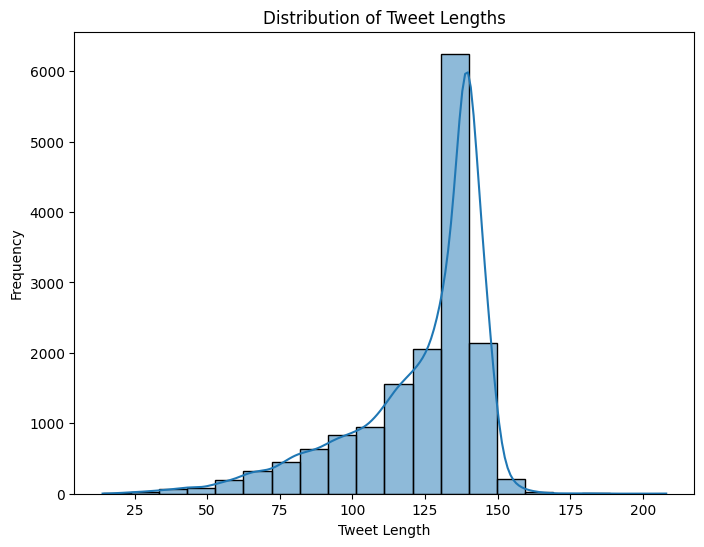

In [21]:
# Distribution of tweet lengths
df['tweet_length'] = df['message'].apply(lambda x: len(x))
plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], bins=20, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

**Oberservation**

• Bars:The bars are more concentrated and taller around the middle of the graph.

• Peak: There is a significant peak at around 140 characters, which suggests that this is the most common tweet length.

• Trend: The frequency of tweets gradually increases as the tweet length approaches 140 characters and then rapidly declines for tweets longer than this.

• Overlay: A line graph is overlaid on the bars to highlight the distribution pattern.

This graph effectively shows that the most frequent tweet length is around the 140-character mark, which was traditionally the character limit for tweets on Twitter. The sharp peak at this length indicates a large number of tweets conforming to this limit.

**Distribution of the number of words in tweets**

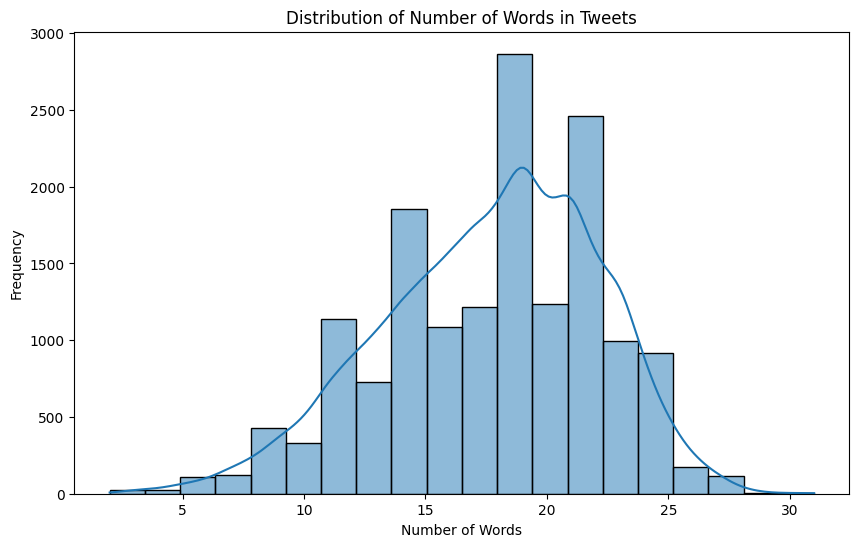

In [22]:
df['num_words'] = df['message'].apply(lambda x: len(x.split()))

# Distribution of the number of words in tweets
plt.figure(figsize=(10, 6))
sns.histplot(df['num_words'], bins=20, kde=True)
plt.title('Distribution of Number of Words in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

**Observation**

• Bars:The bars are more frequent around word counts of 10-15 and peak at a word count of approximately 20.

• Line Graph:It follows the shape formed by the tops of the bars closely, peaking at around the same point where the bars do, which is at the word count of approximately 20.

• Peak Frequency: The highest frequency observed is just above 2500 for tweets containing around 20 words.

• Trend: After the peak at approximately 20 words, the trend decreases sharply, indicating fewer tweets with word counts beyond this point.

This graph provides insight into the common length of tweets, showing that most tweets tend to be around 20 words, which is likely a sweet spot for concise yet informative or engaging content on the platform.




**Most Frequently Used Words in Tweets**

Top 10 most common words:
climate    12170
RT          9706
change      8865
to          7066
the         6397
of          4176
is          4143
a           3825
global      3575
in          3406
Name: count, dtype: int64


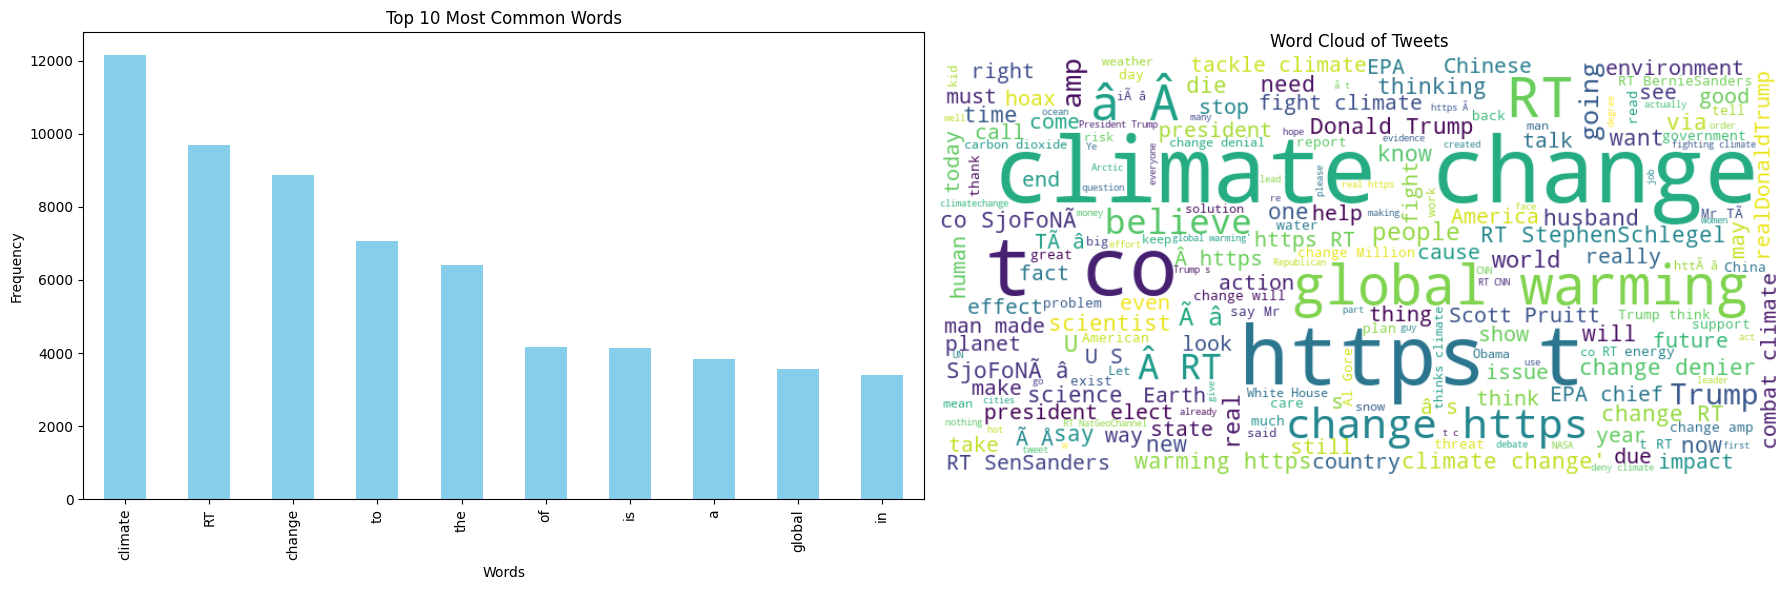

In [23]:

# Word frequency analysis
words = ' '.join(df['message'])
word_freq = pd.Series(words.split()).value_counts()

# Print and plot top 10 most common words
top_10_words = word_freq.head(10)
print("Top 10 most common words:")
print(top_10_words)

plt.figure(figsize=(18, 6))

# Plot bar graph of top 10 most common words
plt.subplot(1, 2, 1)
top_10_words.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Plot word cloud
plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')

plt.tight_layout()
plt.show()


**Observation**

*Top 10 most common Words Bar Graph*

• Bars: Each bar represents the frequency of a word. The height of the bar corresponds to the frequency value on the Y-axis. 

• Word Frequencies: The word “climate” appears most frequently, over 11000 times. The word “it” is the second most frequent, appearing around 9000 times. The word “change” is third, with approximately 8000 occurrences. The frequencies of the remaining words decrease in the order they are listed on the X-axis.

*Word Cloud of Tweets*


• In the word cloud, the size of each word corresponds to its frequency of occurrence. Words like 'Climate Change,' 'https,' and 'global warming' are prominent due to their high occurrence.



<a id="five"></a>

# 5. Data Engineering
<a href=#cont>Back to Table of Contents</a>

### Rearrange the order of the columns, prefer to have the tweetid as the first column.

In [24]:
# Make a copy dataset into a new variable called  
train_df = df.copy()
train_df.head()

,sentiment,message,tweetid,tweet_length,num_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140,19
1,1,It's not like we lack evidence of anthropogeni...,126103,62,10
2,2,RT @RawStory: Researchers say we have three ye...,698562,140,19
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,15
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,18


This is a copy of the dataset in the new variable called train_df.

In [25]:
columns = train_df.columns.tolist()

# We remove "tweetid" from the list of columns
columns.remove("tweetid")

# Then Insert "tweetid" to the end of the list of columns
columns.insert(0, 'tweetid')

# Reorder the columns in the DataFrame
train_df = train_df[columns]

train_df.head()

,tweetid,sentiment,message,tweet_length,num_words
0,625221,1,PolySciMajor EPA chief doesn't think carbon di...,140,19
1,126103,1,It's not like we lack evidence of anthropogeni...,62,10
2,698562,2,RT @RawStory: Researchers say we have three ye...,140,19
3,573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,99,15
4,466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",122,18


There is rearrangement of the columns in the dataset.

### Check for unique values in the tweetid feature, as we know id's must be unique

In [26]:
train_df['tweetid'].nunique()

15819

The number above corresponds with the RangeIndex: 15819 entries of the dataframe. So that means there no duplication of tweetid

### Checking the duplicate of tweets in the messages feature.

In [27]:
# Lets check for duplation of tweet

percent_duplicates = round((1-(train_df['message'].nunique()/len(train_df['message'])))*100,2)
print('Duplicated tweets in train data:')
print(percent_duplicates,'%')


Duplicated tweets in train data:
10.05 %


In [28]:
# Filter duplicated messages
duplicate_tweets = train_df[train_df.duplicated(subset='message', keep=False)]

# Group duplicated tweets by message and sentiment, and count occurrences
duplicated_sentiment_counts = duplicate_tweets.groupby(['message', 'sentiment']).size().reset_index(name='count')

# Display duplicated tweets with their associated sentiment
print("Duplicated Tweets with Sentiment:")
print(duplicated_sentiment_counts)


Duplicated Tweets with Sentiment:
                                               message  sentiment  count
0    Kentut dari hewan-hewan purba adalah penyebab ...          0      3
1    Kentut sapi termasuk penyebab utama global war...          0      2
2    RT @1followernodad: ok a climate change denier...          1      2
3    RT @1followernodad: parent: I'd do anything fo...          1     15
4    RT @ABC: John Kerry says he'll continue with g...          2      3
..                                                 ...        ...    ...
317  RT @wmilam: THIS. Dealing with the inevitable ...          1      2
318  RT @yannickunwomen: Few years ago women and cl...          1      2
319  RT @yo: The state that will be most affected b...          1      3
320  Research - to examine a lifestyle contributing...          1      2
321  There has been no statistically significant gl...         -1      2

[322 rows x 3 columns]


In [29]:
# Filter duplicated messages for each sentiment class
duplicate_sentiment_counts = {}

for sentiment_label in df['sentiment'].unique():
    duplicated_sentiment = df[(df['sentiment'] == sentiment_label) & df.duplicated(subset='message', keep=False)]
    total_count = len(duplicated_sentiment)
    duplicate_sentiment_counts[sentiment_label] = total_count

# Print the counts for each sentiment class
print("Duplicate Messages for Each Sentiment Class:")
for sentiment_label, count in duplicate_sentiment_counts.items():
    print(f"Sentiment {sentiment_label}: {count} duplicate messages")


Duplicate Messages for Each Sentiment Class:
Sentiment 1: 1515 duplicate messages
Sentiment 2: 151 duplicate messages
Sentiment 0: 150 duplicate messages
Sentiment -1: 92 duplicate messages


***The duplication of tweets in the message feature could mean:***

- Identical Content: The same tweet message being posted multiple times by different users or at different times. This could indicate a high level of interest or engagement in the topic discussed in the tweet.

- Automated Posting: Duplicated tweets may be generated by automated bots or spam accounts that repost the same content repeatedly. This could be an attempt to manipulate social media trends or spread misinformation.

- Data Collection Artifacts: Duplicated tweets may also arise from errors or artifacts in the data collection process, such as scraping the same tweet multiple times or merging duplicate entries from different sources.

- User Behavior: Some users may repost the same tweet multiple times to increase visibility or amplify their message. This could be a deliberate strategy to reach a larger audience or reinforce a particular narrative.



### Parts of Speech Tagging and Lemmatization
In this stage, we begin by assessing the length of each tweet and storing this data in a newly created column. Subsequently, we tokenize the tweets, followed by conducting Parts of Speech (POS) tagging on each word, and then perform lemmatization.

Lemmatization involves reducing words to their dictionary root form. For instance, "cats" is transformed into "cat". This process aims to prevent the creation of features that are semantically similar but syntactically different. Lemmatization is favored over stemming due to its ability to handle exceptions more effectively. Stemming, on the other hand, is a more simplistic method that truncates letters from the end of words until a root stem is reached. While effective in many cases, English presents numerous exceptions that necessitate a more refined approach.

In [30]:
def tokenize_and_pos_tag_tweets(df, column_name):
    """
    Tokenize the tweet messages in the specified column of the DataFrame,
    and perform part-of-speech (POS) tagging. Also, lemmatize the tokens.
    
    Args:
    df (pd.DataFrame): DataFrame containing tweet messages.
    column_name (str): Name of the column containing tweet messages.
    
    Returns:
    pd.DataFrame: DataFrame with additional columns for tokenized tweets,
                  POS-tagged tweets, and lemmatized tokens.
    """
   
    
    # Tokenize the tweet messages
    df['tokenized'] = df[column_name].apply(word_tokenize)
    
    # Perform part-of-speech (POS) tagging on the tokenized tweet messages
    df['pos_tags'] = df['tokenized'].apply(nltk.pos_tag)

    def get_wordnet_pos(tag):

        if tag.startswith('J'):
            return wordnet.ADJ

        elif tag.startswith('V'):
            return wordnet.VERB

        elif tag.startswith('N'):
            return wordnet.NOUN

        elif tag.startswith('R'):
            return wordnet.ADV
    
        else:
            return wordnet.NOUN
        
    lemmatizer = WordNetLemmatizer()
    df['pos_tags'] = df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
    df['lemmatized'] = df['pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])
    df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]  
    return df

    
train_df = tokenize_and_pos_tag_tweets(train_df, 'message')
train_df


,tweetid,sentiment,message,tweet_length,num_words,tokenized,pos_tags,lemmatized
0,625221,1,PolySciMajor EPA chief doesn't think carbon di...,140,19,"[PolySciMajor, EPA, chief, does, n't, think, c...","[(PolySciMajor, n), (EPA, n), (chief, n), (doe...",PolySciMajor EPA chief do n't think carbon dio...
1,126103,1,It's not like we lack evidence of anthropogeni...,62,10,"[It, 's, not, like, we, lack, evidence, of, an...","[(It, n), ('s, v), (not, r), (like, n), (we, n...",It 's not like we lack evidence of anthropogen...
2,698562,2,RT @RawStory: Researchers say we have three ye...,140,19,"[RT, @, RawStory, :, Researchers, say, we, hav...","[(RT, n), (@, n), (RawStory, n), (:, n), (Rese...",RT @ RawStory : Researchers say we have three ...
3,573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,99,15,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[(#, n), (TodayinMaker, n), (#, n), (WIRED, n)...",# TodayinMaker # WIRED : 2016 be a pivotal yea...
4,466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",122,18,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[(RT, n), (@, n), (SoyNovioDeTodas, n), (:, n)...","RT @ SoyNovioDeTodas : It 's 2016 , and a raci..."
...,...,...,...,...,...,...,...,...
15814,22001,1,RT @ezlusztig: They took down the material on ...,140,22,"[RT, @, ezlusztig, :, They, took, down, the, m...","[(RT, n), (@, n), (ezlusztig, n), (:, n), (The...",RT @ ezlusztig : They take down the material o...
15815,17856,2,RT @washingtonpost: How climate change could b...,119,13,"[RT, @, washingtonpost, :, How, climate, chang...","[(RT, n), (@, v), (washingtonpost, n), (:, n),...",RT @ washingtonpost : How climate change could...
15816,384248,0,notiven: RT: nytimesworld :What does Trump act...,133,19,"[notiven, :, RT, :, nytimesworld, :, What, doe...","[(notiven, r), (:, n), (RT, n), (:, n), (nytim...",notiven : RT : nytimesworld : What do Trump ac...
15817,819732,-1,RT @sara8smiles: Hey liberals the climate chan...,128,21,"[RT, @, sara8smiles, :, Hey, liberals, the, cl...","[(RT, n), (@, a), (sara8smiles, n), (:, n), (H...",RT @ sara8smiles : Hey liberals the climate ch...


***Note that every word in the pos tags feature is tagged. These means that the tags provide valuable information about the grammatical function and syntactic role of each word in a sentence.***

**Here are some commonly used POS tags along with examples:**

Noun (NN): Represents a person, place, thing, or idea.

Example: "dog", "cat", "house", "city".
Verb (VB): Represents an action or a state of being.

Example: "run", "eat", "sleep", "is", "were".
Adjective (JJ): Describes or modifies a noun.

Example: "happy", "big", "beautiful", "red".
Adverb (RB): Describes or modifies a verb, adjective, or other adverb.

Example: "quickly", "very", "often", "extremely".
Determiner (DT): Indicates specificity or quantity of a noun.

Example: "the", "a", "an", "some", "many".
Pronoun (PRP): Replaces a noun in a sentence.

Example: "he", "she", "it", "they", "we".
Preposition (IN): Indicates a relationship between a noun/pronoun and other words in a sentence.

Example: "in", "on", "at", "from", "to".
Conjunction (CC): Joins words, phrases, or clauses.

Example: "and", "but", "or", "while".
Interjection (UH): Expresses emotions or feelings.

Example: "wow", "ouch", "hey", "hurray".

<a id="six"></a>

# 6. Modeling 
<a href=#cont>Back to Table of Contents</a>

#### Train - Validation split

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [31]:
# Split the dataset into train & validation (25%) for model training

# Seperate features and tagret variables
X = train_df['message']
y = train_df['sentiment']

# Split the train data to create validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

#### Building classification models¶

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following 5 models will be employed:

Random forest,
Naive Bayes, 
, K nearest neighbors
, Logistic regression
Linear SVC

#### About the TFIDVectorizer:

TfidfVectorizer is a tool used to convert text data into numerical vectors that can be understood by machine learning algorithms. It does this by calculating two values for each word in a document:

- Term Frequency (TF): How often a word appears in a document.
- Inverse Document Frequency (IDF): How rare or common a word is across all documents.
- The TfidfVectorizer combines these two values (TF * IDF) to get a TF-IDF score for each word in each document. Words that appear frequently in a document but are rare across all documents will have a high TF-IDF score, indicating they are important for that particular document.


#### Pipelines
The pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

In [32]:
# Random Forest Classifier
rf = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', RandomForestClassifier(max_depth=5, 
                                              n_estimators=150))])

# Naïve Bayes:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB())])

# K-NN Classifier
knn = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', KNeighborsClassifier(n_neighbors=5, 
                                             metric='minkowski', 
                                             p=2))])

# Logistic Regression
lr = Pipeline([('tfidf',TfidfVectorizer()),
               ('clf',LogisticRegression(C=1, 
                                         class_weight='balanced', 
                                         max_iter=1000))])
# Linear SVC:
lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', LinearSVC(class_weight='balanced'))])






In [33]:
gbc = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', GradientBoostingClassifier(max_depth = 5,
                        n_estimators=100,
                        ))])

#### Train the models

The models are trained by passing the train data through each custom pipeline. The trained models are then used to predict the classes for the validation data set.

In [34]:
# Random forest 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_valid)

# Niave bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_valid)

# K - nearest neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_valid)

# Linear regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_valid)

# Linear SVC
lsvc.fit(X_train, y_train)
y_pred_lsvc = lsvc.predict(X_valid)





c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [35]:
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_valid)

<a id="seven"></a>

# 7. Model Performance
<a href=#cont>Back to Table of Contents</a>

#### Model evaluation
The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:

Classification report
Confusion matrix
The best model will be selected based on the weighted F1 score.

### Random forest classification

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. As the name suggests, it is a “forest” of trees!

In [36]:
# Generate a classification Report for the random forest model
print(metrics.classification_report(y_valid, y_pred_rf))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       0.00      0.00      0.00       547
           1       0.55      1.00      0.71      2178
           2       0.00      0.00      0.00       894

    accuracy                           0.55      3955
   macro avg       0.14      0.25      0.18      3955
weighted avg       0.30      0.55      0.39      3955



c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### What we observed:

- From the confusion matrix above we notice that the random forest classification model does a very poor job on our data set. The model classifies all the tweets as pro climate change tweets.
- This results in precision, recall and F1 scores of zero for the anti, neutral and news classes.
- Tree based classification models are especially vulnerable to overfitting when the train data is imbalanced which is the case with our data. The model could be greatly improved by using resampling techniques such as oversampling the anti class and/or undersampling the pro class. This will allow the model to learn how to classify each class equally, improving its accuracy.
- The overall F1 score is 0.55. This is a relatively high score for a model that simply classifies all tweets into a single class. - This score could only be achieved since the majority of the tweets are in fact pro climate change.




##

### Naive Bayes classification

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

Naive Bayes has 3 Classification Methods

- Gaussian : It is used in classification and it assumes that features follow a normal distribution.

- Bernoulli : The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

- Multinomial : It is used for discrete counts. For example, let’s say, we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.


We will be using the multinomial method

In [37]:
# Generate a classification Report for the Naive Bayes model
print(metrics.classification_report(y_valid, y_pred_nb))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       336
           0       1.00      0.05      0.09       547
           1       0.60      0.99      0.75      2178
           2       0.94      0.33      0.48       894

    accuracy                           0.63      3955
   macro avg       0.63      0.34      0.33      3955
weighted avg       0.68      0.63      0.53      3955



c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### What we observed:

- Although the Naive Bayes model is a slight improvement on the random forest model it still performs poorly
- This model classifies most tweets as pro climate change with improved predictions for the news class.
- The precision, accuracy and F1 scores have improved significantly for the news class but remain low for neutral and anti.
- The overall F1 score is 0.63. Again this score could only be achieved since the majority of tweets are in fact pro climate change.


##

##

### K Nearest Neighbors classification

The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

There are various methods for calculating how closely the new datapoint resembles the points in the training set, of which the most commonly known methods are – Euclidian, Manhattan (for continuous) and Hamming distance (for categorical).

New datapoint( Ci ) and multi-classes {1,2,3}.

KNN Classifier would use one of the distance criteria to classify the new datapoint class.

In [38]:
# Generate a classification Report for the K-nearest neighbors model
print(metrics.classification_report(y_valid, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.56      0.40      0.47       336
           0       0.48      0.39      0.43       547
           1       0.74      0.81      0.77      2178
           2       0.68      0.66      0.67       894

    accuracy                           0.69      3955
   macro avg       0.62      0.57      0.59      3955
weighted avg       0.67      0.69      0.68      3955



#### What we observed:

- KNN is able to successfully classify the tweets.
- This model also classifies most tweets as pro climate change but to a smaller degree compared to the previous 2 models.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.69 which is very close to our target but not there yet... The search continues.


##


##
### Logistic regression classification¶

Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

Logistic regression has been rated as the best performing model for linearly separable data especially if it's predicting binary data(Yes & NO or 1 & 0), and performs better when there's no class imbalance.



In [39]:
# Generate a classification Report for the model
print(metrics.classification_report(y_valid, y_pred_lr))


              precision    recall  f1-score   support

          -1       0.55      0.65      0.60       336
           0       0.50      0.56      0.53       547
           1       0.86      0.69      0.77      2178
           2       0.65      0.88      0.75       894

    accuracy                           0.71      3955
   macro avg       0.64      0.69      0.66      3955
weighted avg       0.74      0.71      0.72      3955




#### What we observed:

- Logistic regression is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class.
- The precision, accuracy and F1 scores have improved significantly for the pro, anti and neutral classes.
- There is a drop in the F1 score for the pro climate change class as the predictions become more balanced.
- The overall F1 score is 0.71 which is on target. Let's see if we can improve.


##

##

### Linear SVC classification
In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:


In [40]:
# Generate a classification Report for the linear SVC model
print(metrics.classification_report(y_valid, y_pred_lsvc))

              precision    recall  f1-score   support

          -1       0.63      0.57      0.60       336
           0       0.57      0.49      0.53       547
           1       0.82      0.80      0.81      2178
           2       0.71      0.84      0.77       894

    accuracy                           0.75      3955
   macro avg       0.68      0.68      0.68      3955
weighted avg       0.74      0.75      0.74      3955



##

#### What we observed:

- Linear SVC is able to successfully classify the tweets.
- This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class compared to the first 3 models.
- This model shows a higher degree of confusion surrounding the pro class compared to logistic regression.
- This, however, leads to an increase in the precision, accuracy and f1 score for the pro class which makes up the majority of the tweets.
- Linear SVC has achieved the highest F1 score of 0.75

<a id="eight"></a>

# 8. Model Validation & Selection
<a href=#cont>Back to Table of Contents</a>

### The Best ML Machine is Linear SVC has achieved the highest F1 score of 0.75.

### Hyperparameter tuning

<p>Once our top performing model has been selected, we attempt to improve it by performing some hyperparameter tuning.</p>

<p>After the optimal parameters are determined the linear SVC model is retrained using these parameters, resulting in a 2% increase in the F1 score.</p>

#### What is Stratified K-Fold Cross-Validation?

Stratified K-Fold Cross-Validation is a variation of K-Fold Cross-Validation that ensures each fold maintains the same proportion of observations for each target class as the complete dataset. This is especially crucial for datasets where one class might be heavily underrepresented.

Why Use Stratified K-Fold Cross-Validation?

- Balanced Splits: Standard K-Fold Cross-Validation can sometimes result in imbalanced class distributions across the folds. 
- Stratified K-Fold ensures every fold has a representative class distribution.
- Better Generalization: Since each fold has a similar distribution, the model is less likely to be biased towards any particular class, leading to better generalization on unseen data.
- Robust Performance Metrics: With balanced class distribution in each fold, performance metrics such as accuracy, precision, and recall become more reliable.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Lets Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=.5, max_iter=3000))])


# Define the number of folds for cross-validation
n_folds = 45

# Initialize StratifiedKFold with the number of folds
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=98)

# Perform cross-validation
fold_accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the pipeline on the training data
    lsvc_op.fit(X_train, y_train)
    
    # Predict labels on the test data
    y_pred = lsvc_op.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Calculate the mean accuracy across all folds
mean_accuracy = sum(fold_accuracies) / n_folds
print("Mean Accuracy:", mean_accuracy)

In [ ]:
# Refit and predict
lsvc_op.fit(X_train, y_train)
y_pred_1 = lsvc_op.predict(X_valid)
print(metrics.classification_report(y_valid, y_pred_1))


print('F1 score improved by',
      round(100*((metrics.accuracy_score(y_pred_1, y_valid) - metrics.accuracy_score(y_pred_lsvc, y_valid)) /metrics.accuracy_score(y_pred_lsvc, y_valid)),0), 
      '%')

In [ ]:

# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred_1, average='weighted')
precision = precision_score(y_valid, y_pred_1, average='weighted')
recall = recall_score(y_valid, y_pred_1, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()



### Saving the results a CSV File 

In [44]:

y_test = lsvc_op.predict(df_test['message'])
output = pd.DataFrame({'tweetid': df_test.tweetid,
                       'sentiment': y_test})
output.to_csv('./submissions/ac1_submission_lsvcopT17.csv', index=False)
output

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,1
10544,867455,0


<a id="nine"></a>

# 9. Conclusion
<a href=#cont>Back to Table of Contents</a>

To reduce their carbon footprint, companies worldwide are producing environmentally friendly products, and their marketing department needs to understand consumers' perspectives on climate change in order to adjust their marketing strategies accordingly. 

The team has designed a classification model to assist companies in determining the general public's view on the topic. 

The application can successfully classify text inputted into it into sentiments using machine learning classification algorithms. 

By utilising the application, businesses will be equipped with the strategic intelligence needed to navigate complex societal issues effectively.

More than half of the tweets examined support the beilief of man-made climate change. Futhermore, climate change is now one of the two most important issues in politics for Democrats. The data also suggests that the majority of anti climate change tweets come from Republicans and Trump supporters

Last year Trump’s administration formally began the process to exit the climate deal, in which nearly 200 nations pledged to reduce greenhouse gas emissions and assist poor nations struggling with the consequences of a warming Earth. We noticed that the majority of tweets about climate change across all classes involve the Paris agreement, COP22, Trump and Trump related hashtags/mentions. It was intresting to note that the most links are being shared in the pro climate change class and not in the news related class.

<a id="ten"></a>

# 10. References
<a href=#cont>Back to Table of Contents</a>

1- What is climate change? (no date) United Nations. Available at: https://www.un.org/en/climatechange/what-is-climate-change (Accessed: 23 February 2024).

2- Nerger, M. (2022) 6 claims made by climate change skeptics-and how to respond, Rainforest Alliance. Available at: https://www.rainforest-alliance.org/everyday-actions/6-claims-made-by-climate-change-skeptics-and-how-to-respond/ (Accessed: 23 February 2024).

3- Common arguments against climate science (no date) Common Arguments Against Climate Science | GEOG/EME 432: Energy Policy. Available at: https://www.e-education.psu.edu/geog432/node/405 (Accessed: 23 February 2024). 

4- Jain, Y. (2023) A comprehensive guide on Marketing for Business: 5 key elements, Emeritus India. Available at: https://emeritus.org/in/learn/what-is-the-importance-of-marketing-for-business/ (Accessed: 23 February 2024).


5- The Paris Agreement (no date) United Nations. Available at: https://www.un.org/en/climatechange/paris-agreement (Accessed: 23 February 2024).

6- Pal, S. (2023) The pitfalls of bad marketing p - a recipe for business disaster, LinkedIn. Available at: https://www.linkedin.com/pulse/pitfalls-bad-marketing-p-recipe-business-disaster-shubham-pal/ (Accessed: 23 February 2024).

7- Here’s what our research says about news audiences on Twitter, the platform now known as X (no date) Reuters Institute for the Study of Journalism. Available at: https://reutersinstitute.politics.ox.ac.uk/news/heres-what-our-research-says-about-news-audiences-twitter-platform-now-known-x#:~:text=Twitter%2C%20when%20compared%20to%20other,some%20political%20topics%20on%20Twitter. (Accessed: 23 February 2024). 

8- Keserer, E. (2024) 8 types of machine learning classification algorithms, Akkio. AvailableKeserer, E. (2024) 8 types of machine learning classification algorithms, Akkio. Available at: https://www.akkio.com/post/5-types-of-machine-learning-classification-algorithms (Accessed: 24 February 2024).

9- Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

10- R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].

11- SUNIL RAY. (2017) [online] Available at: Understanding Support Vector Machine(SVM) algorithm from examples (along with code) https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ [Accessed 18 June 2020]

12- www.javatpoint.com. (n.d.). Support Vector Machine (SVM) Algorithm - Javatpoint. [online] Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm [Accessed 18 Jun. 2020].

